### This notebook looks at the convergence check cases. Uses core of Pressure

0.008137485848855595
0.008150257274685657
0.007821433589917649


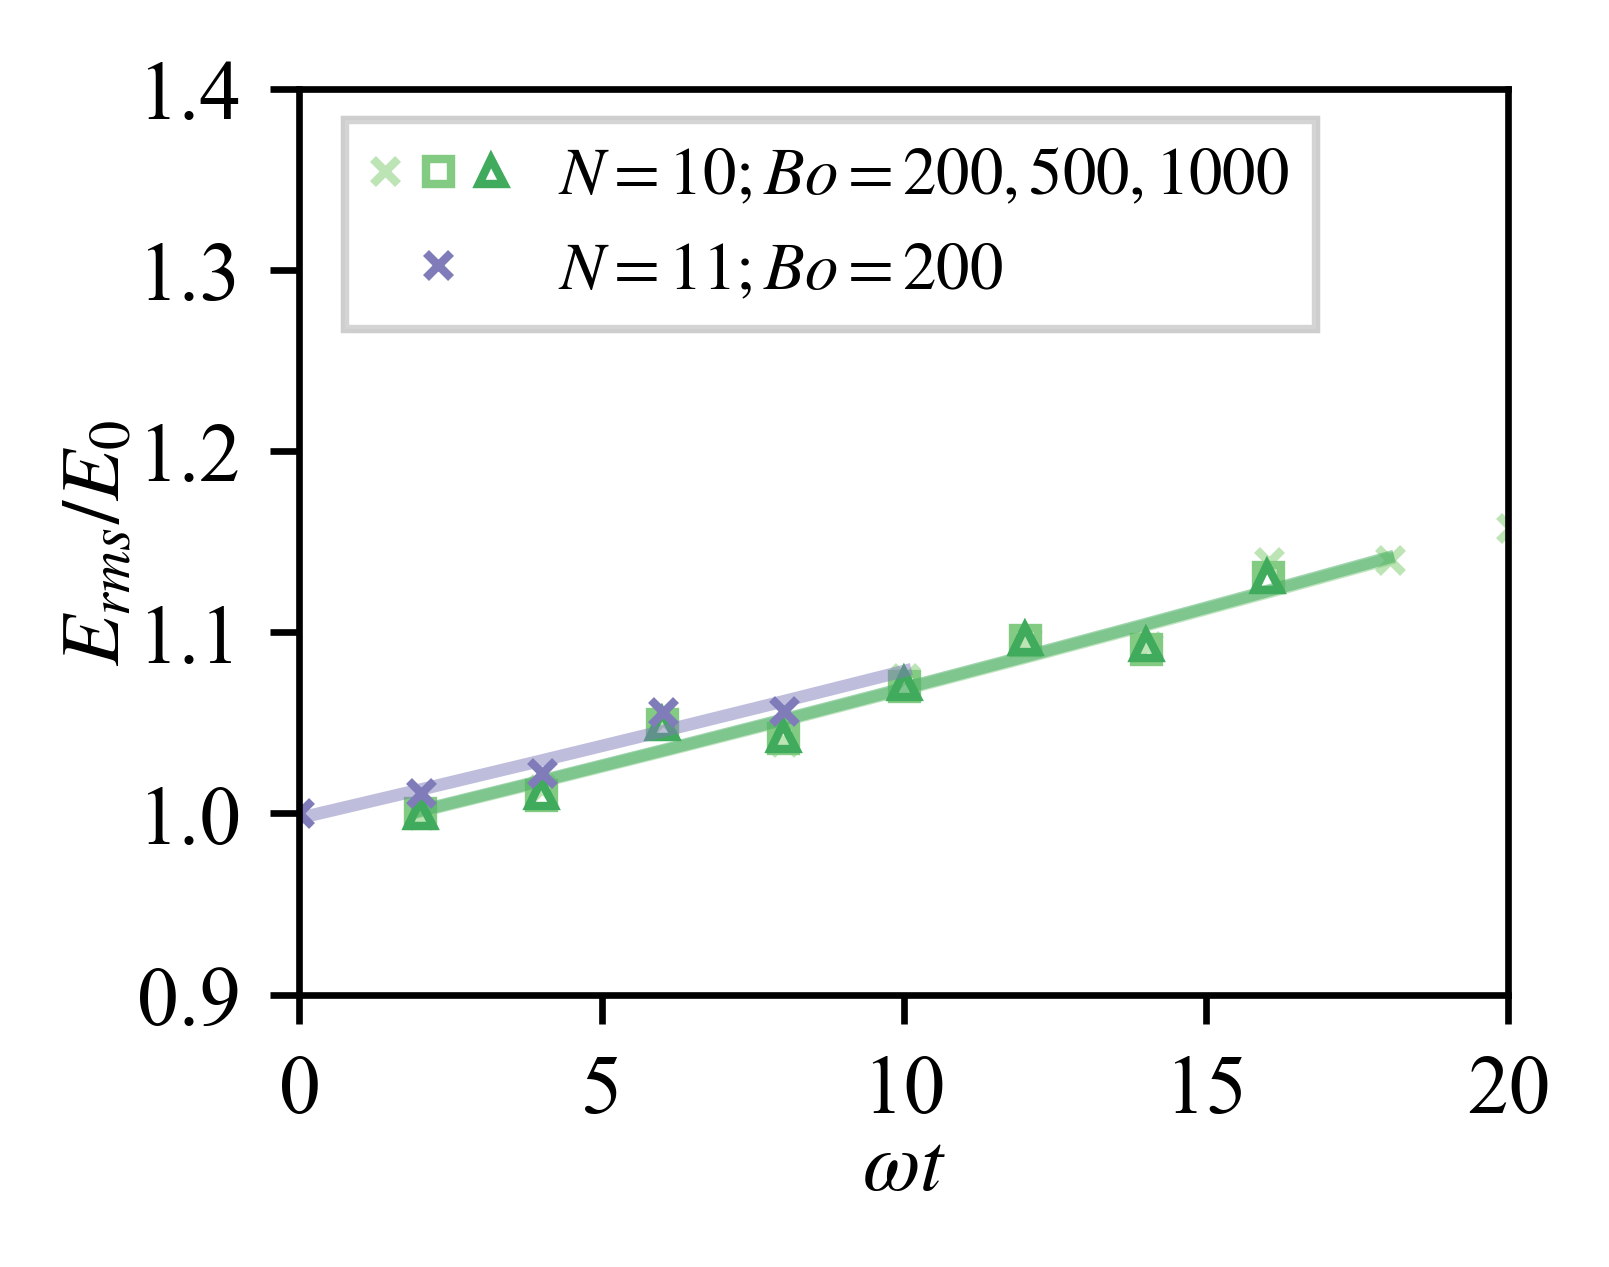

In [82]:
""" FIGURE: Wave growth plot, after all the E_rms have been computed. """
fig = plt.figure(figsize=[2.6,2]); ax = plt.gca()

def plotE(case, skip=1):
    l, = plt.plot(np.array(case.phase['t'][0:-1:skip])*case.wave.omega, case.E_rms_raw[0:-1:skip]/case.E_rms[0], marker=case.marker, mfc='none',
             label=r'$N=%g, Bo=%g$' %(case.LEVEL, case.Bo), lw=0, markersize=3, color=case.cc, alpha = 1)
    return(l)
#     plt.plot(np.array(case.phase['t'])*case.wave.omega, case.Ep/case.Ep[0], color=case.cc, marker = case.marker, mfc='none',
#              markeredgewidth=1, lw=0, markersize=3)

""" Fit an exponential """
def fit_exponential(case):
    case.wa, wb = np.polyfit(np.array(case.phase['t'])[0:]*case.wave.omega, np.log(case.E_rms_raw/case.E_rms[0])[0:], 1)
    plt.plot(np.array(case.phase['t'])*case.wave.omega, np.exp(case.wa*np.array(case.phase['t'])*case.wave.omega+wb), color=case.cc, alpha = 0.5)
    print(case.wa)

l_list =[]
case7.cc = cmap(17)
case = case7
l1, = plt.plot(np.array(case.phase['t'][9:-1:10])*case.wave.omega, case.E_rms_raw[9:-1:10]/case.E_rms[0], marker=case.marker, mfc='none',
         label=r'$N=%g, Bo=%g$' %(case.LEVEL, case.Bo), lw=0, markersize=3, color=case.cc, alpha = 1) 
l_list.append(l1)

case_con1.cc = cmap(5)
case_con1.marker = 'x'
case_con2.cc = cmap(19)
case_con2.marker = 's'
case_con3.cc = cmap(21)
case_con3.marker = '^'
for case in (case_con2,case_con3,case_con1):    
    l = plotE(case)
    l_list.append(l)
    fit_exponential(case)
    
legend1 = plt.legend([(l_list[0],l_list[1],l_list[2]),l_list[3]], [r'$N=10; Bo=200, 500, 1000$', r'$N=11; Bo=200$'],
                       handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.01, 0.85), frameon=True, fancybox=False, handlelength=2, fontsize=8)
ax.add_artist(legend1)

plt.xlabel(r'$\omega t$', labelpad=0); plt.ylabel(r'$E_{rms}/E_0$', labelpad=0)
plt.ylim([0.9,1.4])
plt.xlim([0, 20])
fig.savefig('figures_jfm/convergence_E.pdf', bbox_inches='tight')

0.20344650961525096
0.15467220578411842
0.1590185079493205
0.15901600920834383


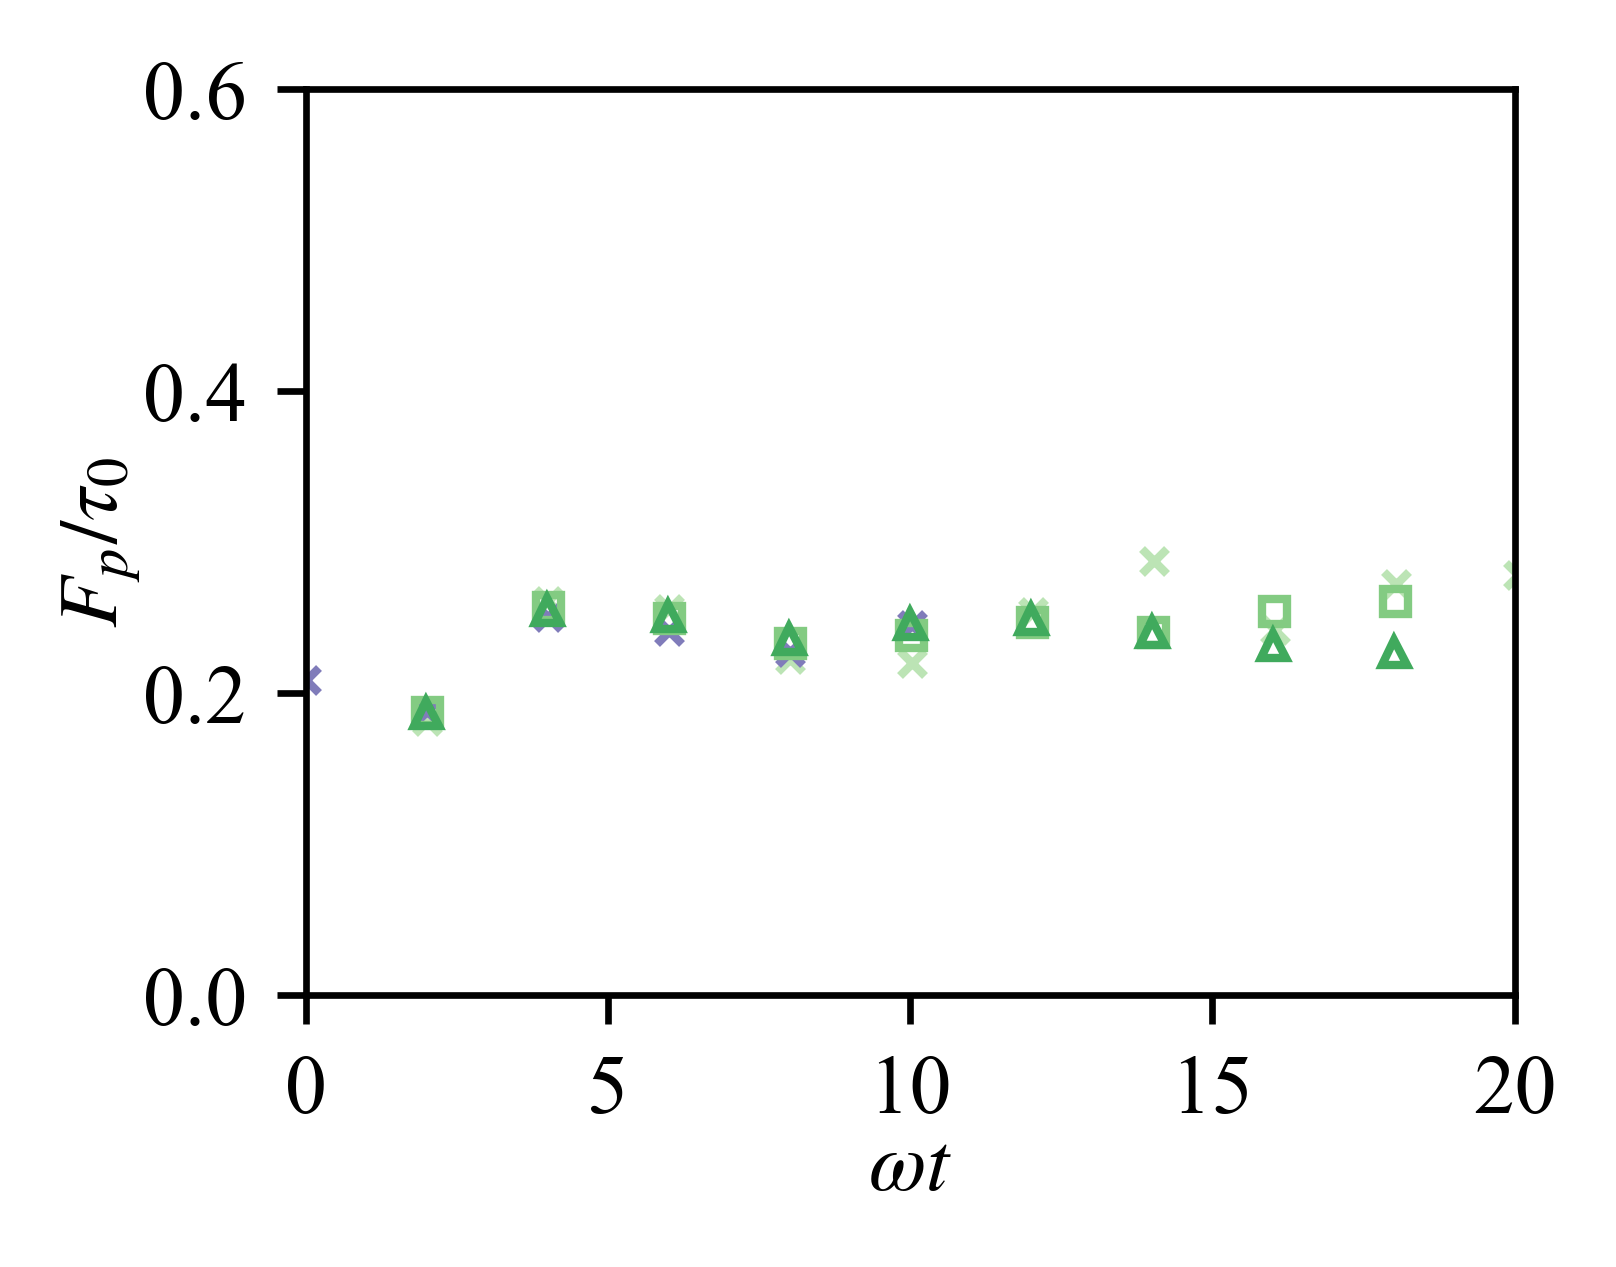

In [83]:
fig = plt.figure(figsize=[2.6,2]); ax = plt.gca()
for case in (case7,case_con1,case_con2,case_con3):
# for case in (case4,case5,case6):
    eta = np.average(case.phase['eta'][-1], axis=0) - np.average(case.phase['eta'][-1], axis=(0,1))
    print((np.average(eta**2)*2)**0.5*4)
    plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp/(case.ustar**2*case.rho2), marker=case.marker, mfc='none',
             label=r'$N=%g, Bo=%g$' %(case.LEVEL, case.Bo), lw=0, markersize=3, color=case.cc)
plt.xlim([0,20])
plt.ylim([0,0.6])
plt.xlabel(r'$\omega t$', labelpad=0); plt.ylabel(r'$F_p/\tau_0$', labelpad=0)
fig.savefig('figures_jfm/convergence_Fp.pdf', bbox_inches='tight')